# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [50]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [33]:
# Carregando features.txt

variaveis = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\features.txt"
df_variaveis = pd.read_csv(variaveis, sep=' ', header=None)

# Carregando subject_train.txt

treino = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\train\subject_train.txt"
df_treino = pd.read_csv(treino, header=None)

# Carregando X_train.txt

treino_x = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt"
df_treino_x = pd.read_csv(treino_x, header=None, sep='\s+')

In [34]:
# Removendo a primeira coluna que ficou com o index duplicado

df_variaveis.drop(columns=0, inplace=True)

# Colocando as variáveis como coluna

df_treino_x.columns = df_variaveis

# Colocando a subject_train como uma nova coluna do dataframe

df_treino_x['subject_train'] = df_treino

# Resetando o index
# Quando eu utilizo esta função eu crio uma nova coluna com o index anterior

df_treino_x.reset_index(inplace=True)

# Setando o index anterior e o subject_train como indice

df_treino_x = df_treino_x.set_index(['index', 'subject_train'])

In [35]:
df_treino_x.head()

,,"(tBodyAcc-mean()-X,)","(tBodyAcc-mean()-Y,)","(tBodyAcc-mean()-Z,)","(tBodyAcc-std()-X,)","(tBodyAcc-std()-Y,)","(tBodyAcc-std()-Z,)","(tBodyAcc-mad()-X,)","(tBodyAcc-mad()-Y,)","(tBodyAcc-mad()-Z,)","(tBodyAcc-max()-X,)",...,"(fBodyBodyGyroJerkMag-meanFreq(),)","(fBodyBodyGyroJerkMag-skewness(),)","(fBodyBodyGyroJerkMag-kurtosis(),)","(angle(tBodyAccMean,gravity),)","(angle(tBodyAccJerkMean),gravityMean),)","(angle(tBodyGyroMean,gravityMean),)","(angle(tBodyGyroJerkMean,gravityMean),)","(angle(X,gravityMean),)","(angle(Y,gravityMean),)","(angle(Z,gravityMean),)"
index,subject_train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [36]:
# Carregando a base de X_test.txt

teste_x = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt"
df_teste_x = pd.read_csv(teste_x, header=None, sep='\s+')


# Colocando as variáveis como coluna

df_teste_x.columns = df_variaveis

# Carregando o subject_test

teste = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\test\subject_test.txt"
df_teste = pd.read_csv(teste, header=None)


# Colocando a subject_teste como uma nova coluna do dataframe

df_teste_x['subject_teste'] = df_teste

# Resetando o index
# Quanop eu utilizo esta função eu crio uma nova coluna com o index anterior

df_teste_x.reset_index(inplace=True)

# Setando o index anterior e o subject_train como indice

df_teste_x = df_teste_x.set_index(['index', 'subject_teste'])

In [37]:
df_teste_x.head()

,,"(tBodyAcc-mean()-X,)","(tBodyAcc-mean()-Y,)","(tBodyAcc-mean()-Z,)","(tBodyAcc-std()-X,)","(tBodyAcc-std()-Y,)","(tBodyAcc-std()-Z,)","(tBodyAcc-mad()-X,)","(tBodyAcc-mad()-Y,)","(tBodyAcc-mad()-Z,)","(tBodyAcc-max()-X,)",...,"(fBodyBodyGyroJerkMag-meanFreq(),)","(fBodyBodyGyroJerkMag-skewness(),)","(fBodyBodyGyroJerkMag-kurtosis(),)","(angle(tBodyAccMean,gravity),)","(angle(tBodyAccJerkMean),gravityMean),)","(angle(tBodyGyroMean,gravityMean),)","(angle(tBodyGyroJerkMean,gravityMean),)","(angle(X,gravityMean),)","(angle(Y,gravityMean),)","(angle(Z,gravityMean),)"
index,subject_teste,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [38]:
# Separando a base em treino e teste

X_test = df_teste_x
X_train = df_treino_x

caminho_teste_y = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt"
caminho_treino_y = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt"

y_train = pd.read_csv(caminho_treino_y, header=None)
y_test = pd.read_csv(caminho_teste_y, header=None)

In [39]:
# Criando a base de validação

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [41]:
%%time

# Rodando a árvore de decisão com ccp_alpha=0.001

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001).fit(X_train, y_train)

CPU times: total: 1.56 s
Wall time: 3.05 s


In [42]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
valid_score = clf.score(X_valid, y_valid)

print(f'train_score: {train_score} || test_score: {test_score} || valid_score: {valid_score}')

train_score: 0.975335509611897 || test_score: 0.8435697319307771 || valid_score: 0.9461371055495104


### Avaliação:

Ao se comparar o tempo necessário para treinar o modelo com vários ccp_alphas, como visto em aula, e o tempo necessário para treinar o modelo com apenas um ccp_alpha, é evidente que utilizando apenas um ccp_alpha o modelo é bem mais rápido, demorando 3.05 s em comparação aos 2min e 52s visto em aula. Além disso, deve-se levar em conta que o computador utilizado para realizar a tarefa não é o mesmo que foi utilizado em aula, portanto o tempo obtido poderia variar muito mais.

## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [44]:
%%time

prcomp = PCA(n_components=1).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)
pc_valida = prcomp.transform(X_valid)

pc_treino.shape

CPU times: total: 46.9 ms
Wall time: 114 ms


(5514, 1)

In [45]:
n=1

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test  = pd.DataFrame(pc_teste[:,:n], columns = colunas)
pc_valid = pd.DataFrame(pc_valida[:,:n], columns = colunas)

pc_train.head()

,cp1
0,-3.017672
1,-5.921079
2,7.433549
3,4.537914
4,2.714440


In [46]:
%%time

# Treinando o modelo

clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

CPU times: total: 719 ms
Wall time: 2.08 s


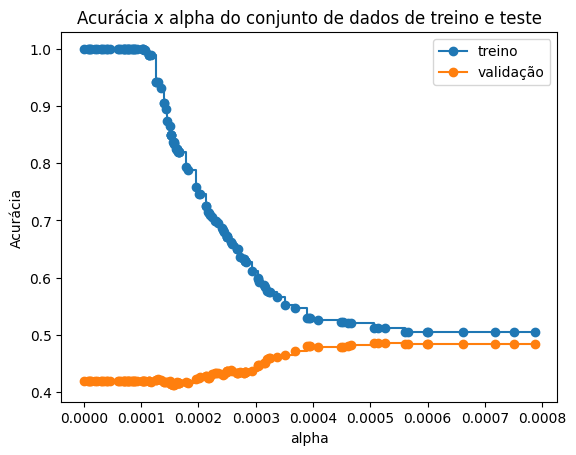

In [51]:
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
valid_scores = [clf.score(pc_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], valid_scores[:nx], marker='o', label="validação", drawstyle="steps-post")

ax.legend()
plt.show()

In [52]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_test, y_test)*100:.1f}')

melhor_arvore

Acurácia da melhor árvore na base de treino:    51.3
Acurácia da melhor árvore na base de validação: 48.5
Acurácia da melhor árvore na base de teste:     46.0


DecisionTreeClassifier(ccp_alpha=0.000525825842282776, random_state=2360873)

## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [86]:
%%time

componentes = [1, 2, 5, 10, 50]

treino_acc = []
validacao_acc = []
teste_acc = []

for i in componentes:

    prcomp = PCA(n_components=i).fit(X_train)

    pc_treino = prcomp.transform(X_train)
    pc_teste  = prcomp.transform(X_test)
    pc_valida = prcomp.transform(X_valid)

    n=i

    colunas = ['cp'+str(x+1) for x in list(range(n))]

    pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
    pc_test  = pd.DataFrame(pc_teste[:,:n], columns = colunas)
    pc_valid = pd.DataFrame(pc_valida[:,:n], columns = colunas)

   # Treinando o modelo

    clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

    caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
    ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

    ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
        clfs.append(clf)

    train_scores = [clf.score(pc_train, y_train) for clf in clfs]
    valid_scores = [clf.score(pc_valid, y_valid) for clf in clfs]

    ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
    melhor_arvore = clfs[ind_melhor_arvore]

    treino_acc.append(train_scores[ind_melhor_arvore])
    validacao_acc.append(valid_scores[ind_melhor_arvore])
    teste_acc.append(melhor_arvore.score(pc_test, y_test))


CPU times: total: 7 s
Wall time: 41.1 s


In [88]:
print(f'Treino: {treino_acc}')
print(f'Validação: {validacao_acc}')
print(f'Teste: {teste_acc}')

Treino: [0.5125136017410229, 0.6802684076895176, 0.9047878128400435, 0.9044250997461009, 0.9775117881755532]
Validação: [0.485310119695321, 0.5805223068552775, 0.8313384113166485, 0.8667029379760609, 0.8764961915125136]
Teste: [0.45978961655921274, 0.5816084153376315, 0.7590770274855786, 0.8133695283338989, 0.8011537156430268]


## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

### Acurácia

Observa-se que com o aumento da quantidade de componentes, também observa-se um aumento no valor da acurácia.
Isso pode ser verificado em todos os parâmetros analisados.
Observa-se também que com a utilização de 50 componentes, no método PCA, obtem-se um valor de acurácia muito próximo ao da árvore com todos os parâmetros, visto em aula. 


### Tempo de processamento

Com o aumento na quantidade de componentes observa-se também um aumento no tempo de processamento.
Contudo, deve-se destacar que, apesar do aumento do tempo necessário para realizar o processamento, este continua menor do que o necessário para sem utilizar o método do PCA.
Além disso, o tempo necessário para aplicação de uma modelagem da árvore sem o método PCA, realizada em aula, é maior do que o tempo utilizado para modelar cinco modelos utilizando o método PCA.